In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk #this is the most popular library for statistics and machine learning
import math
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [16]:
df_subset = df[df['price']>30000]

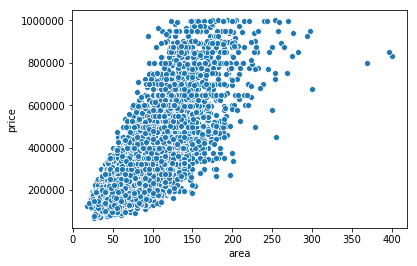

In [17]:
#without a regression line
sns.scatterplot(data=df_subset, x = 'area', y = 'price')

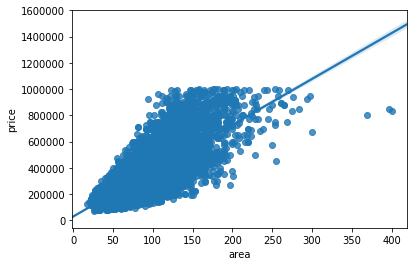

In [18]:
#with a regression line
sns.regplot(data=df_subset, x = 'area', y = 'price')

In [19]:
#To use sk-learn, we need to create lists of the two variables
#Tote that you need to use [[]] with x, because x could be multiple variables (each variable is a list)
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept
print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.


The regression line is equal to y = 1139.56 + 207124.91X


The formula is
y= 1139.56 + 207124.91X

In [20]:
1139.56 + 207124.91*70

14499883.260000002

In [21]:
df_subset3 = df[['area', 'price']]
df_subset3['price_p'] = lm.predict(x)
df_subset3.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,area,price,price_p
0,108,510000,330197.492903
1,47,215000,260684.274834
2,116,325000,339313.980519
3,58,315000,273219.445306
4,63,200000,278917.250066
5,125,515000,349570.029086
6,64,200000,280056.811018
7,155,599000,383756.857644
8,85,249000,303987.591008
9,67,300000,283475.493873


In [22]:
df[df['address']=="Slichtenhorststraat 10"].head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983


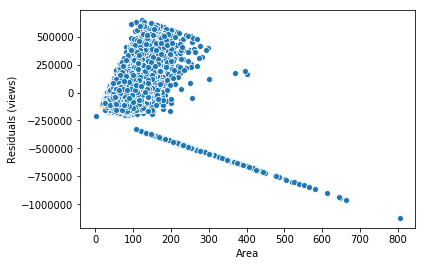

In [23]:
#getting the residuals
df['resid'] = df['price'] - df_subset3['price_p']

#plot x & e
sns.scatterplot(x='area',y='resid',data=df)
plt.xlabel('Area')
plt.ylabel('Residuals (views)')
plt.show()

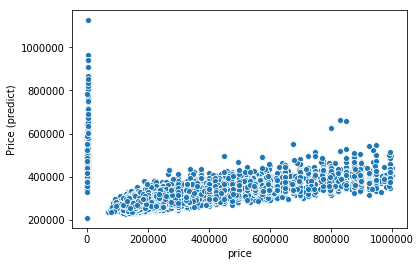

In [24]:
sns.scatterplot(x='price',y='price_p',data=df_subset3)
plt.xlabel('price')
plt.ylabel('Price (predict)')
plt.show()

In [25]:
r2_score(df['price'], df_subset3['price_p'])

0.09764871906008399

In [26]:
math.sqrt(mean_squared_error(df['price'], df_subset3['price_p']))

168566.4358478545

The more expensive houses I guess. 